# Make Colors

Color palette inspired by https://www.c82.net/euclid/

### import packages

In [1]:
import pickle
import numpy as np
from matplotlib import colors
import pandas as pd
import seaborn as sns

### defintion of colors

In [2]:
d = {'yellow':  {'HEX': '#fac32b', 'RGB': (250, 195, 43), 'CMYK': (0, 22, 83, 2)},
     'blue': {'HEX': '#0f638f', 'RGB': (15, 99, 143), 'CMYK': (90, 31, 0, 44)},
     'red': {'HEX': '#d62a20', 'RGB': (214, 42, 32), 'CMYK': (0, 80, 85, 16)},
     'beige': {'HEX': '#fef4db', 'RGB': (254, 244, 219), 'CMYK': (0, 4, 14, 0)},
     'black': {'HEX': '#000000', 'RGB': (0, 0, 0), 'CMYK': (0, 0, 0, 100)},
     'white': {'HEX': '#ffffff', 'RGB': (255,255,255), 'CMYK': (0, 0, 0, 0)} }

### make RGBA colors

In [3]:
def rgb_to_rgba(rgb_color):
    
    rgba_color = tuple(np.array(rgb_color)/255)
    rgba_color = (round(rgba_color[0], 3),
                  round(rgba_color[1], 3),
                  round(rgba_color[2], 3),
                  1
                 )
    
    return rgba_color

In [4]:
for key in d:
    d[key]['RGBA'] = rgb_to_rgba(d[key]['RGB'])

### make DataFrame

In [5]:
color_df = pd.DataFrame(d).T.loc[:, ['RGBA']]
color_df

RGBA
yellow   (0.98, 0.765, 0.169, 1)
blue    (0.059, 0.388, 0.561, 1)
red     (0.839, 0.165, 0.125, 1)
beige   (0.996, 0.957, 0.859, 1)
black         (0.0, 0.0, 0.0, 1)
white         (1.0, 1.0, 1.0, 1)

### blend RGBA colors

In [6]:
n_steps = 101

palette_dict = {}

for key1 in color_df.index:
    for key2 in color_df.index:
        
        if key1 != key2:
            these_colors = [d[key1]['RGBA'],
                      d[key2]['RGBA']
                     ]

            my_palette = sns.blend_palette(these_colors, n_steps)

            a = []
            while len(my_palette)>0:
                a += [tuple(my_palette.pop())]

            palette_dict[f'{key1}-{key2}'] = a[::-1]

In [7]:
rgba_df = pd.DataFrame(palette_dict).T
rgba_df.head()

0    \
yellow-blue   (0.98, 0.765, 0.169)   
yellow-red    (0.98, 0.765, 0.169)   
yellow-beige  (0.98, 0.765, 0.169)   
yellow-black  (0.98, 0.765, 0.169)   
yellow-white  (0.98, 0.765, 0.169)   

                                                            1    \
yellow-blue   (0.9727764705882352, 0.762043137254902, 0.1720...   
yellow-red    (0.9788941176470588, 0.7602941176470588, 0.168...   
yellow-beige  (0.9801254901960784, 0.7665058823529411, 0.174...   
yellow-black    (0.972313725490196, 0.759, 0.16767450980392157)   
yellow-white  (0.9801568627450981, 0.7668431372549019, 0.175...   

                                                            2    \
yellow-blue   (0.9619411764705882, 0.7576078431372549, 0.176...   
yellow-red    (0.9772352941176471, 0.7532352941176471, 0.168...   
yellow-beige  (0.980313725490196, 0.7687647058823529, 0.1825...   
yellow-black    (0.9607843137254902, 0.75, 0.16568627450980394)   
yellow-white  (0.9803921568627451, 0.7696078431372549, 0.185...   

                                                            3    \
yellow-blue   (0.9547176470588236, 0.7546509803921568, 0.179...   
yellow-red    (0.9761294117647059, 0.7485294117647059, 0.167...   
yellow-beige  (0.9804392156862745, 0.7702705882352942, 0.187...   
yellow-black    (0.9530980392156863, 0.744, 0.1643607843137255)   
yellow-white  (0.9805490196078431, 0.7714509803921569, 0.191...   

                                                            4    \
yellow-blue   (0.9438823529411764, 0.7502156862745099, 0.184...   
yellow-red    (0.9744705882352941, 0.7414705882352941, 0.167...   
yellow-beige  (0.9806274509803922, 0.7725294117647059, 0.196...   
yellow-black   (0.9415686274509804, 0.735, 0.16237254901960785)   
yellow-white  (0.9807843137254901, 0.7742156862745098, 0.201...   

                                                            5    \
yellow-blue   (0.9366588235294118, 0.7472588235294118, 0.187...   
yellow-red    (0.9733647058823529, 0.736764705882353, 0.1669...   
yellow-beige  (0.9807529411764706, 0.774035294117647, 0.2014...   
yellow-black   (0.9338823529411765, 0.729, 0.16104705882352943)   
yellow-white  (0.9809411764705882, 0.7760588235294118, 0.208...   

                                                            6    \
yellow-blue   (0.9258235294117647, 0.7428235294117648, 0.192...   
yellow-red    (0.9717058823529412, 0.7297058823529412, 0.166...   
yellow-beige  (0.9809411764705882, 0.7762941176470588, 0.209...   
yellow-black    (0.9223529411764706, 0.72, 0.15905882352941178)   
yellow-white  (0.9811764705882353, 0.7788235294117647, 0.217...   

                                                            7    \
yellow-blue   (0.9186, 0.7398666666666667, 0.19513333333333335)   
yellow-red                 (0.9706, 0.725, 0.16606666666666667)   
yellow-beige  (0.9810666666666666, 0.7778, 0.21500000000000002)   
yellow-black   (0.9146666666666666, 0.714, 0.15773333333333334)   
yellow-white  (0.9813333333333333, 0.7806666666666667, 0.224...   

                                                            8    \
yellow-blue   (0.9077647058823529, 0.7354313725490196, 0.199...   
yellow-red    (0.9689411764705882, 0.7179411764705883, 0.165...   
yellow-beige  (0.9812549019607842, 0.7800588235294118, 0.223...   
yellow-black  (0.9031372549019607, 0.7050000000000001, 0.155...   
yellow-white  (0.9815686274509804, 0.7834313725490196, 0.234...   

                                                            9    ...  \
yellow-blue   (0.8969294117647059, 0.7309960784313726, 0.204...  ...   
yellow-red    (0.9672823529411765, 0.7108823529411765, 0.165...  ...   
yellow-beige  (0.981443137254902, 0.7823176470588236, 0.2312...  ...   
yellow-black   (0.8916078431372549, 0.696, 0.15375686274509806)  ...   
yellow-white  (0.9818039215686274, 0.7861960784313725, 0.243...  ...   

                                                            91   \
yellow-blue   (0.14207058823529406, 0.4220039215686275, 0.52...   
yellow-red 

In [8]:
rgba_df.tail()

0    \
white-yellow  (1.0, 1.0, 1.0)   
white-blue    (1.0, 1.0, 1.0)   
white-red     (1.0, 1.0, 1.0)   
white-beige   (1.0, 1.0, 1.0)   
white-black   (1.0, 1.0, 1.0)   

                                                            1    \
white-yellow  (0.9998431372549019, 0.9981568627450981, 0.993...   
white-blue      (0.9926196078431373, 0.9952, 0.996556862745098)   
white-red     (0.9987372549019607, 0.9934509803921568, 0.993...   
white-beige   (0.9999686274509804, 0.9996627450980392, 0.998...   
white-black   (0.9921568627450981, 0.9921568627450981, 0.992...   

                                                            2    \
white-yellow  (0.9996078431372549, 0.9953921568627451, 0.983...   
white-blue      (0.9815490196078431, 0.988, 0.9913921568627451)   
white-red     (0.9968431372549019, 0.9836274509803922, 0.982...   
white-beige   (0.999921568627451, 0.9991568627450981, 0.9972...   
white-black   (0.9803921568627451, 0.9803921568627451, 0.980...   

                                                            3    \
white-yellow  (0.9994509803921569, 0.9935490196078431, 0.977...   
white-blue     (0.9741686274509804, 0.9832, 0.9879490196078431)   
white-red     (0.9955803921568628, 0.977078431372549, 0.9759...   
white-beige   (0.9998901960784313, 0.9988196078431373, 0.996...   
white-black   (0.9725490196078431, 0.9725490196078431, 0.972...   

                                                            4    \
white-yellow  (0.9992156862745099, 0.9907843137254903, 0.967...   
white-blue      (0.9630980392156863, 0.976, 0.9827843137254902)   
white-red     (0.993686274509804, 0.9672549019607843, 0.9656...   
white-beige   (0.9998431372549019, 0.998313725490196, 0.9944...   
white-black   (0.9607843137254902, 0.9607843137254902, 0.960...   

                                                            5    \
white-yellow  (0.9990588235294118, 0.9889411764705882, 0.960...   
white-blue     (0.9557176470588236, 0.9712, 0.9793411764705883)   
white-red     (0.9924235294117647, 0.9607058823529412, 0.958...   
white-beige   (0.9998117647058824, 0.9979764705882352, 0.993...   
white-black   (0.9529411764705882, 0.9529411764705882, 0.952...   

                                                            6    \
white-yellow  (0.9988235294117647, 0.9861764705882353, 0.951...   
white-blue      (0.9446470588235294, 0.964, 0.9741764705882353)   
white-red     (0.9905294117647059, 0.9508823529411765, 0.948...   
white-beige   (0.9997647058823529, 0.9974705882352941, 0.991...   
white-black   (0.9411764705882353, 0.9411764705882353, 0.941...   

                                                            7    \
white-yellow   (0.9986666666666667, 0.9843333333333333, 0.9446)   
white-blue     (0.9372666666666667, 0.9592, 0.9707333333333333)   
white-red     (0.9892666666666666, 0.9443333333333334, 0.941...   
white-beige    (0.9997333333333334, 0.9971333333333333, 0.9906)   
white-black   (0.9333333333333333, 0.9333333333333333, 0.933...   

                                                            8    \
white-yellow  (0.9984313725490196, 0.9815686274509804, 0.934...   
white-blue      (0.9261960784313725, 0.952, 0.9655686274509804)   
white-red     (0.9873725490196078, 0.9345098039215687, 0.931...   
white-beige   (0.999686274509804, 0.9966274509803922, 0.9889...   
white-black   (0.9215686274509804, 0.9215686274509804, 0.921...   

                                                            9    ...  \
white-yellow  (0.9981960784313726, 0.9788039215686275, 0.925...  ...   
white-blue     (0.9151254901960785, 0.9448, 0.9604039215686274)  ...   
white-red     (0.985478431372549, 0.9246862745098039, 0.9210...  ...   
white-beige   (0.9996392156862746, 0.9961215686274509, 0.987...  ...   
white-black   (0.9098039215686274, 0.9098039215686274, 0.909...  ...   

                                                            91   \
white-yellow  (0.9818039215686274, 0.7861960784313726, 0.243...   
white-blue    (0.14387450980392158, 

### convert to HEX colors

In [9]:
hex_df = rgba_df.applymap(lambda x:colors.to_hex(x))
hex_df.tail()

0        1        2        3        4        5        6    \
white-yellow  #ffffff  #fffffd  #fffefb  #fffdf9  #fffdf7  #fffcf5  #fffbf3   
white-blue    #ffffff  #fdfefe  #fafcfd  #f8fbfc  #f6f9fb  #f4f8fa  #f1f6f8   
white-red     #ffffff  #fffdfd  #fefbfb  #fef9f9  #fdf7f6  #fdf5f4  #fdf2f2   
white-beige   #ffffff  #ffffff  #fffffe  #fffffe  #fffffe  #fffefd  #fffefd   
white-black   #ffffff  #fdfdfd  #fafafa  #f8f8f8  #f5f5f5  #f3f3f3  #f0f0f0   

                  7        8        9    ...      91       92       93   \
white-yellow  #fffbf1  #fffaee  #fffaec  ...  #fac83e  #fac83c  #fac739   
white-blue    #eff5f8  #ecf3f6  #e9f1f5  ...  #257199  #226f98  #1f6d97   
white-red     #fcf1f0  #fceeee  #fbeceb  ...  #da3d34  #d93b31  #d9382f   
white-beige   #fffefd  #fffefc  #fffefc  ...  #fef5de  #fef5de  #fef5dd   
white-black   #eeeeee  #ebebeb  #e8e8e8  ...  #171717  #141414  #111111   

                  94       95       96       97       98       99       100  
white-yellow  #fac738  #fac635  #fac533  #fac531  #fac42f  #fac42d  #fac32b  
white-blue    #1d6c96  #1a6a94  #186993  #166792  #146691  #116490  #0f638f  
white-red     #d8372d  #d8342a  #d83229  #d73026  #d72e24  #d62c22  #d62a20  
white-beige   #fef5dd  #fef5dd  #fef4dc  #fef4dc  #fef4dc  #fef4db  #fef4db  
white-black   #0f0f0f  #0c0c0c  #0a0a0a  #070707  #050505  #020202  #000000  

[5 rows x 101 columns]

compare: https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas

In [10]:
hex_df.loc[:, ::10].style.applymap(lambda x:'background: %s'%x)

### making color palette

Blue to Yellow does not look good, so there are three transitions and some tweaking to make the color distribution similar to ```RdYlBu_r```

In [11]:
my_color_list = list(hex_df.loc['blue-white'].values[:-5]) + list(hex_df.loc['white-yellow'].values[5::2]) + list(hex_df.loc['yellow-red'].values[::2])
color_palette = sns.color_palette(my_color_list)

#### Quick visualisation of color palette

In [12]:
sns.color_palette(color_palette[::10])

[(0.058823529411764705, 0.38823529411764707, 0.5607843137254902),
 (0.15294117647058825, 0.4470588235294118, 0.6039215686274509),
 (0.24705882352941178, 0.5098039215686274, 0.6470588235294118),
 (0.3411764705882353, 0.5686274509803921, 0.6901960784313725),
 (0.43529411764705883, 0.6313725490196078, 0.7372549019607844),
 (0.5294117647058824, 0.6941176470588235, 0.7803921568627451),
 (0.6235294117647059, 0.7568627450980392, 0.8235294117647058),
 (0.7176470588235294, 0.8156862745098039, 0.8705882352941177),
 (0.8117647058823529, 0.8784313725490196, 0.9137254901960784),
 (0.9058823529411765, 0.9411764705882353, 0.9568627450980393),
 (0.996078431372549, 0.9686274509803922, 0.8941176470588236),
 (0.9921568627450981, 0.9215686274509803, 0.7254901960784313),
 (0.9882352941176471, 0.8745098039215686, 0.5607843137254902),
 (0.984313725490196, 0.8274509803921568, 0.39215686274509803),
 (0.9803921568627451, 0.7803921568627451, 0.2235294117647059),
 (0.9647058823529412, 0.6941176470588235, 0.16470588235294117),
 (0.9333333333333333, 0.5725490196078431, 0.1568627450980392),
 (0.9058823529411765, 0.45098039215686275, 0.1450980392156863),
 (0.8784313725490196, 0.3333333333333333, 0.13725490196078433),
 (0.8509803921568627, 0.21176470588235294, 0.12941176470588237)]

#### fake data

In [13]:
fake_df = pd.DataFrame(np.array([[1,2, 2.4],[3,4, 2.5]]))
fake_df

0    1    2
0  1.0  2.0  2.4
1  3.0  4.0  2.5

### visualisation

with own colors

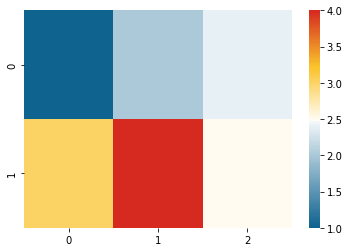

In [14]:
sns.heatmap(fake_df, cmap=color_palette);

comparison: with ```RdYlBu_r``` default

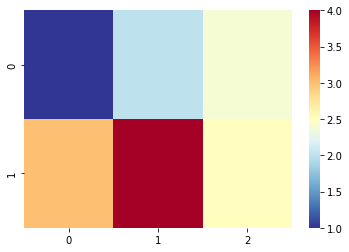

In [15]:
sns.heatmap(fake_df, cmap='RdYlBu_r');

### store for re-use

In [16]:
with open('palette.pkl','wb') as fp:
    pickle.dump(color_palette, fp)

Example re-load

In [17]:
with open('palette.pkl','rb') as fp:
    color_palette = pickle.load(fp)

In [18]:
sns.color_palette(color_palette[::10])

[(0.058823529411764705, 0.38823529411764707, 0.5607843137254902),
 (0.15294117647058825, 0.4470588235294118, 0.6039215686274509),
 (0.24705882352941178, 0.5098039215686274, 0.6470588235294118),
 (0.3411764705882353, 0.5686274509803921, 0.6901960784313725),
 (0.43529411764705883, 0.6313725490196078, 0.7372549019607844),
 (0.5294117647058824, 0.6941176470588235, 0.7803921568627451),
 (0.6235294117647059, 0.7568627450980392, 0.8235294117647058),
 (0.7176470588235294, 0.8156862745098039, 0.8705882352941177),
 (0.8117647058823529, 0.8784313725490196, 0.9137254901960784),
 (0.9058823529411765, 0.9411764705882353, 0.9568627450980393),
 (0.996078431372549, 0.9686274509803922, 0.8941176470588236),
 (0.9921568627450981, 0.9215686274509803, 0.7254901960784313),
 (0.9882352941176471, 0.8745098039215686, 0.5607843137254902),
 (0.984313725490196, 0.8274509803921568, 0.39215686274509803),
 (0.9803921568627451, 0.7803921568627451, 0.2235294117647059),
 (0.9647058823529412, 0.6941176470588235, 0.16470588235294117),
 (0.9333333333333333, 0.5725490196078431, 0.1568627450980392),
 (0.9058823529411765, 0.45098039215686275, 0.1450980392156863),
 (0.8784313725490196, 0.3333333333333333, 0.13725490196078433),
 (0.8509803921568627, 0.21176470588235294, 0.12941176470588237)]

### make simple colormaps

In [19]:
blue_palette = sns.color_palette( hex_df.loc['white-blue', :].values[1:])

with open('blue_palette.pkl','wb') as fp:
    pickle.dump(blue_palette, fp)
    
sns.color_palette(blue_palette[::10])

[(0.9921568627450981, 0.996078431372549, 0.996078431372549),
 (0.8980392156862745, 0.9333333333333333, 0.9529411764705882),
 (0.803921568627451, 0.8745098039215686, 0.9098039215686274),
 (0.7098039215686275, 0.8117647058823529, 0.8627450980392157),
 (0.615686274509804, 0.7490196078431373, 0.8196078431372549),
 (0.5215686274509804, 0.6862745098039216, 0.7764705882352941),
 (0.4235294117647059, 0.6274509803921569, 0.7333333333333333),
 (0.3333333333333333, 0.5647058823529412, 0.6901960784313725),
 (0.23529411764705882, 0.5019607843137255, 0.6431372549019608),
 (0.1450980392156863, 0.44313725490196076, 0.6)]

In [20]:
red_palette = sns.color_palette( hex_df.loc['white-red', :].values[1:])

with open('red_palette.pkl','wb') as fp:
    pickle.dump(red_palette, fp)
    
sns.color_palette(red_palette[::10])

[(1.0, 0.9921568627450981, 0.9921568627450981),
 (0.9803921568627451, 0.9098039215686274, 0.9019607843137255),
 (0.9647058823529412, 0.8274509803921568, 0.8196078431372549),
 (0.9490196078431372, 0.7411764705882353, 0.7294117647058823),
 (0.9333333333333333, 0.6588235294117647, 0.6431372549019608),
 (0.9176470588235294, 0.5725490196078431, 0.5529411764705883),
 (0.9019607843137255, 0.49019607843137253, 0.4627450980392157),
 (0.8862745098039215, 0.40784313725490196, 0.3803921568627451),
 (0.8705882352941177, 0.3215686274509804, 0.2901960784313726),
 (0.8549019607843137, 0.23921568627450981, 0.20392156862745098)]

In [21]:
beige_palette = sns.color_palette( hex_df.loc['white-beige', :].values[1:])

with open('beige_palette.pkl','wb') as fp:
    pickle.dump(beige_palette, fp)
    
sns.color_palette(beige_palette[::10])

[(1.0, 1.0, 1.0),
 (1.0, 0.996078431372549, 0.984313725490196),
 (1.0, 0.9921568627450981, 0.9725490196078431),
 (1.0, 0.9882352941176471, 0.9568627450980393),
 (1.0, 0.984313725490196, 0.9411764705882353),
 (0.996078431372549, 0.9764705882352941, 0.9294117647058824),
 (0.996078431372549, 0.9725490196078431, 0.9137254901960784),
 (0.996078431372549, 0.9686274509803922, 0.8980392156862745),
 (0.996078431372549, 0.9647058823529412, 0.8862745098039215),
 (0.996078431372549, 0.9607843137254902, 0.8705882352941177)]

In [22]:
yellow_palette = sns.color_palette( hex_df.loc['white-yellow', :].values[1:])

with open('yellow_palette.pkl','wb') as fp:
    pickle.dump(yellow_palette, fp)
    
sns.color_palette(yellow_palette[::10])

[(1.0, 1.0, 0.9921568627450981),
 (0.996078431372549, 0.9725490196078431, 0.9098039215686274),
 (0.996078431372549, 0.9529411764705882, 0.8274509803921568),
 (0.9921568627450981, 0.9254901960784314, 0.7411764705882353),
 (0.9921568627450981, 0.9058823529411765, 0.6627450980392157),
 (0.9882352941176471, 0.8784313725490196, 0.5764705882352941),
 (0.9882352941176471, 0.8549019607843137, 0.49019607843137253),
 (0.984313725490196, 0.8313725490196079, 0.4117647058823529),
 (0.984313725490196, 0.807843137254902, 0.3254901960784314),
 (0.9803921568627451, 0.7843137254901961, 0.24313725490196078)]

### make set of primary colors

In [23]:
primary_palette = sns.color_palette(hex_df.loc[::5, 0].values)

In [24]:
with open('primary_palette.pkl','wb') as fp:
    pickle.dump(primary_palette, fp)

In [25]:
sns.color_palette(primary_palette)

[(0.9803921568627451, 0.7647058823529411, 0.16862745098039217),
 (0.058823529411764705, 0.38823529411764707, 0.5607843137254902),
 (0.8392156862745098, 0.16470588235294117, 0.12549019607843137),
 (0.996078431372549, 0.9568627450980393, 0.8588235294117647),
 (0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0)]

### make set of 7 colors for the 7 face expressions

In [26]:
palette7 = list(np.array(color_palette)[[0, 60, 100, 120, 175, 194, 0]])

In [27]:
palette7[0] = [0.058823529411764705, 0.38823529411764707, 0.5607843137254902]
palette7[2] = [0.6, 0.6, 0.6]
palette7[3] = [0.9803921568627451, 0.7647058823529411, 0.16862745098039217]
palette7[4] = [0.9379764705882353, 0.5861764705882353, 0.15588627450980394] 
palette7[5] = [0.8392156862745098, 0.16470588235294117, 0.12549019607843137]
palette7[6] = [0.5269999999999999, 0.2542, 0.2994]

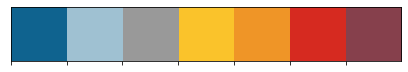

In [28]:
sns.palplot(palette7)

In [29]:
with open('palette7.pkl','wb') as fp:
    pickle.dump(palette7, fp)